# Escuela de Ciencias Básicas, Tecnología e Ingeniería  
## 202016908A – Análisis de datos  
### Tarea 5 - Proyecto Análisis De Datos  

**Nombre del estudiante:**  
Kevin Arley Buitrago Maldonado  

**Documento de identidad:**  
CC. 1002624126  

**Nro. de grupo:**  
202016908_90  

**Presentado a:**  
Ing. Angela Bibiana Ortegón Fuentes  

**Universidad Nacional Abierta Y A Distancia (UNAD)**  
**Escuela De Ciencias Básicas, Tecnología E Ingeniería (ECBTI)**  
**Curso: Análisis de datos**  
**Diciembre - 2024**  

In [ ]:
# 1. Cargar y explorar el dataset  
En esta sección se cargará el conjunto de datos y se realizará una exploración inicial para entender su estructura, contenido y características principales.  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar Datos
Data = pd.read_csv('./TitanicDataset.csv')

# Mostrar Datos
Data.head(5)

# Descripción de los datos
Data.describe()

In [3]:
# Manejar datos faltantes
Data['Age'].fillna(Data['Age'].mean(), inplace=True)
Data['Embarked'].fillna('S', inplace=True)

In [4]:
# Mostrar Datos
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Confirmación de columnas
Data.columns

<Axes: xlabel='Age'>

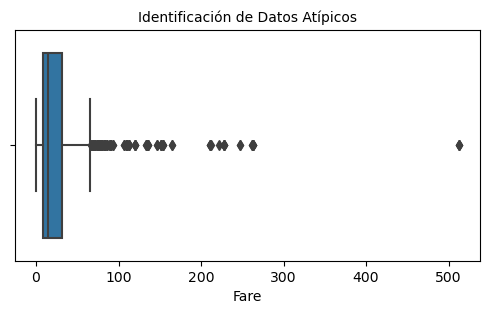

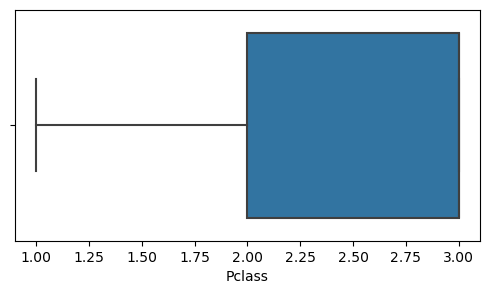

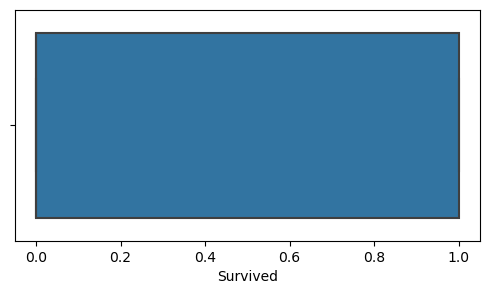

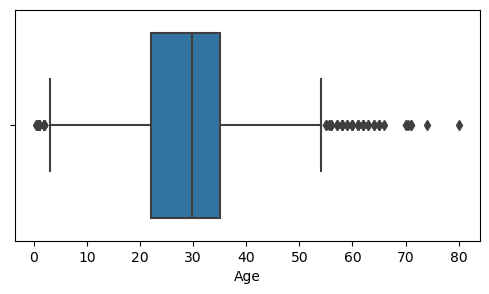

In [6]:
# Análisis exploratorio de datos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Pclass'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Survived'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])

In [8]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
Data['Sex'] = label_encoder.fit_transform(Data['Sex'])
Data['Embarked'] = label_encoder.fit_transform(Data['Embarked'])

# Definir los Limites para los datos atipicos. 


In [7]:
max_fare = 300
min_fare = 0
total_fare = ((Data['Fare'] < min_fare) | (Data['Fare'] > max_fare)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para los registros de tarifa es {}".format(total_fare))
print("")
Data.info()

Total registros dataset: 891
El total de datos atípicos para los registros de tarifa es 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Seleccion de Caracteristicas

In [9]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = Data[features]
Y = Data['Survived']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
# Validar datos en train
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,3,1,28.0,0,0,7.8958,2
68,3,0,17.0,4,2,7.9250,2


In [11]:
# Validar datos en test
X_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,29.699118,0,0,14.4583,0
648,3,1,29.699118,0,0,7.5500,2


In [13]:
# Realizar predicciones
Prediccion = modelo_clasificacion.predict(X_test)

# Matriz de confucion

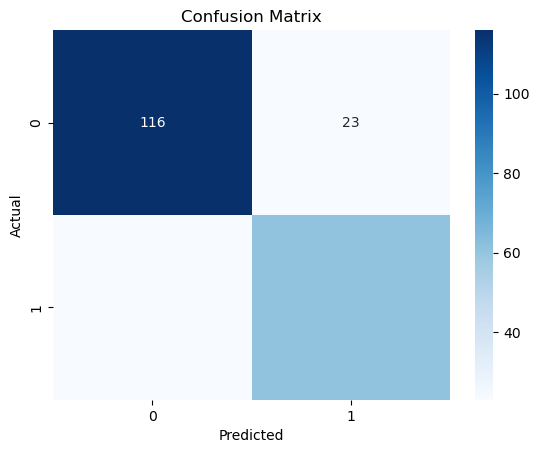

In [15]:
conf_matrix = confusion_matrix(Y_test, Prediccion)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Coheficientes del Modelo

In [16]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': modelo_clasificacion.coef_[0]
})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.971762
1       Sex    -2.599743
2       Age    -0.038523
3     SibSp    -0.338189
4     Parch    -0.047468
5      Fare     0.001429
6  Embarked    -0.220508


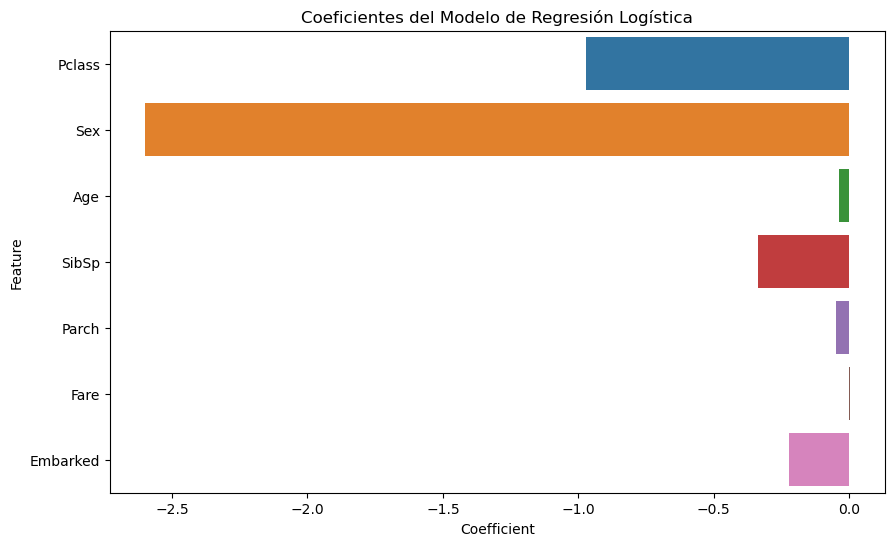

In [17]:
# Gráfica de Coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.show()

# Análisis de Resultados  

## Datos Explorados:  
- El dataset del Titanic fue preparado y explorado. Contiene **891 registros** y **12 columnas**, con información como 
edad, género, tarifa, y si el pasajero sobrevivió o no.  
-Se identificaron y manejaron valores faltantes en las columnas **Age** y **Embarked**, y se codificaron las variables
categóricas (**Sex** y **Embarked**) usando un `LabelEncoder`.  

## Selección de características y entrenamiento:  
- Las características seleccionadas fueron: **Pclass**, **Sex**, **Age**, **SibSp**, **Parch**, **Fare**, y **Embarked**.  
- El dataset se dividió en un conjunto de entrenamiento (**75%**) y prueba (**25%**).  

## Evaluación del modelo:  

### Matriz de confusión:  
- El modelo produjo una matriz de confusión que permite evaluar:  
  - **Verdaderos positivos (TP)**: Casos correctamente clasificados como sobrevivientes.  
  - **Falsos positivos (FP)**: Casos erróneamente clasificados como sobrevivientes.  
  - **Verdaderos negativos (TN)**: Casos correctamente clasificados como no sobrevivientes.  
  - **Falsos negativos (FN)**: Casos erróneamente clasificados como no sobrevivientes.  
- Visualizada con un heatmap para mayor claridad.  

### Coeficientes del modelo:  
- Los coeficientes asociados a cada característica indican su importancia relativa en la predicción:  
  - **Sex** y **Pclass** tienen coeficientes negativos significativos, lo que sugiere que estas variables tienen un impacto 
considerable en la predicción de supervivencia.  
  - **Fare** tiene un coeficiente positivo, aunque pequeño, indicando una relación más débil.  
